In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


### NOTE - DATASET IS NOT REQUIRED TO BE LOADED, ALTHOUGH THE DATA HAS BEEN PROVIDED TO USE FROM LOCAL SYSTEM, PREFERRED WAY IS FROM API which is coded.

In [3]:
amazon = yf.Ticker("AMZN")

In [4]:
amazon_info = amazon.info
amazon_info

{'address1': '410 Terry Avenue North',
 'city': 'Seattle',
 'state': 'WA',
 'zip': '98109-5210',
 'country': 'United States',
 'phone': '206 266 1000',
 'website': 'https://www.aboutamazon.com',
 'industry': 'Internet Retail',
 'industryKey': 'internet-retail',
 'industryDisp': 'Internet Retail',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': "Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions through online and physical stores in North America and internationally. It operates through three segments: North America, International, and Amazon Web Services (AWS). The company's products offered through its stores include merchandise and content purchased for resale; and products offered by third-party sellers. It also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Rings, Blink, eero, and Echo; and develops and produces media content. In addit

In [5]:
amazon_data = amazon.history(period='max')

amazon_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-12 00:00:00-05:00,155.389999,156.199997,154.009995,154.619995,40460300,0.0,0.0
2024-01-16 00:00:00-05:00,153.529999,154.990005,152.149994,153.160004,41384600,0.0,0.0
2024-01-17 00:00:00-05:00,151.490005,152.149994,149.910004,151.710007,34953400,0.0,0.0


In [6]:
import pandas as pd

# 1. Remove 'Dividends' and 'Stock Splits' columns
amazon_data = amazon_data.drop(columns=['Dividends', 'Stock Splits'])

# 2. Adjust the Date Format
# Convert the index to just the date format without time and timezone
amazon_data.index = amazon_data.index.date

# 3. Add an 'Adj Close' Column
amazon_data['Adj Close'] = amazon_data['Close']

# 4. Reset the Index
amazon_data = amazon_data.reset_index()

# Rename the 'index' column to 'Date'
amazon_data.rename(columns={'index': 'Date'}, inplace=True)

# Display the DataFrame
print(amazon_data.head())


         Date      Open      High       Low     Close      Volume  Adj Close
0  1997-05-15  0.121875  0.125000  0.096354  0.097917  1443120000   0.097917
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   294000000   0.086458
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   122136000   0.085417
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   109344000   0.081771
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   377064000   0.071354


In [7]:
# Load the dataset only if you want to run the dataset from local system, otherwise data will be retrieved from API
# amazon_data = pd.read_csv("C:/Users/Usman/Desktop/FYP/Dataset/AMZN.csv")


In [8]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000,0.097917
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,0.086458
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000,0.085417
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000,0.081771
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000,0.071354


### Data Description

In [9]:
# Displaying the basic statistical details like percentile, mean, std etc.
descriptive_stats = amazon_data.describe()

print(descriptive_stats)

              Open         High          Low        Close        Volume  \
count  6714.000000  6714.000000  6714.000000  6714.000000  6.714000e+03   
mean     34.549873    34.964722    34.101672    34.542068  1.399574e+08   
std      50.349159    50.938258    49.706765    50.324939  1.389094e+08   
min       0.070313     0.072396     0.065625     0.069792  9.744000e+06   
25%       2.045844     2.084375     2.000000     2.047250  6.672350e+07   
50%       7.392750     7.504500     7.309500     7.460250  1.036120e+08   
75%      47.561124    47.860750    47.151875    47.520624  1.584000e+08   
max     187.199997   188.654007   184.839493   186.570496  2.086584e+09   

         Adj Close  
count  6714.000000  
mean     34.542068  
std      50.324939  
min       0.069792  
25%       2.047250  
50%       7.460250  
75%      47.520624  
max     186.570496  


<b>The Amazon dataset contains data from January 3, 2005, onwards and includes the following columns:</b>
<ul>
<li>Date: The date of the stock data.</li>
<li>Open: The opening price of the stock for the day.</li>
<li>High: The highest price of the stock during the day.</li>
<li>Low: The lowest price of the stock during the day.</li>
<li>Close: The closing price of the stock for the day.</li>
<li>Adj Close: The adjusted closing price of the stock for the day (adjusted for splits and dividends).</li>
<li>Volume: The number of shares traded during the day.</li>
</ul>

In [10]:
# Checking the first few rows of the dataset
data_head = amazon_data.head()

# Checking for missing values
missing_values = amazon_data.isnull().sum()

missing_values

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

<b>Missing Values:</b>

There are no missing values in any of the columns, indicating a complete dataset with no gaps in the recorded dates or stock metrics.

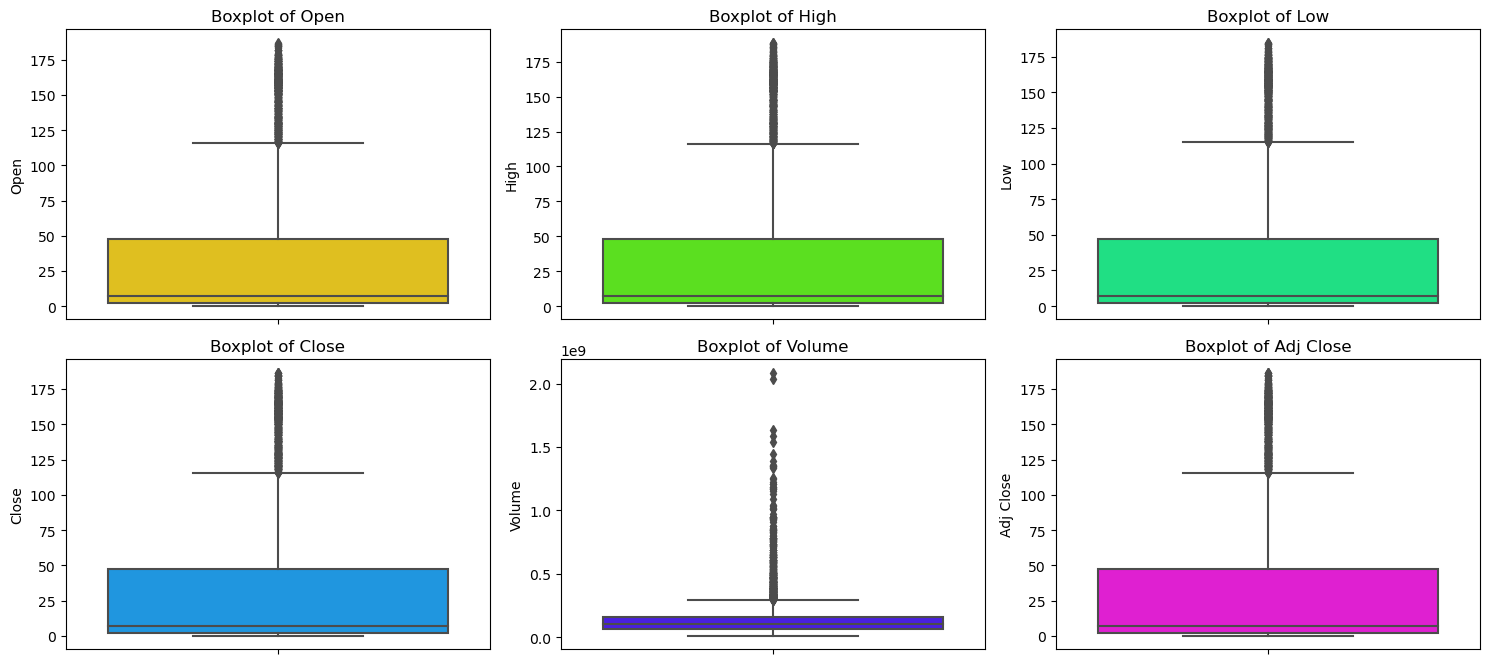

In [11]:
# Outlier Analysis

# Selecting numerical columns
numerical_columns = amazon_data.select_dtypes(include=['float64', 'int64']).columns

# Defining a palette with a different color for each numerical column
palette = sns.color_palette("hsv", len(numerical_columns))

# Creating boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=amazon_data[column], palette=[palette[i]])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()


<b>Open, High, Low, Close, Adj. Close:</b>

For these attributes, the median values overall show consistency indicating the presence of less observable outliers.

<b>Volume:</b>

There are numerous outliers on the upper side, indicating days with exceptionally high trading volumes. These could correspond to significant corporate announcements, earnings reports, or market events.


## Exploratory Data Analysis

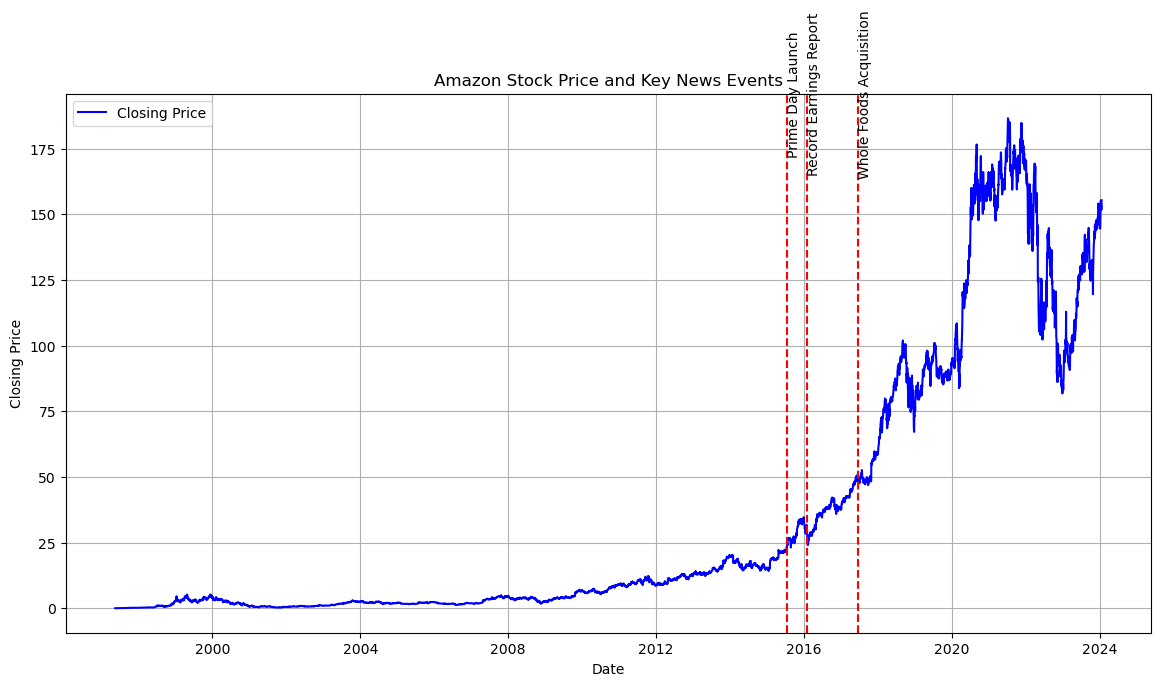

In [12]:
# Making a copy of the original DataFrame
amzn_df_copy = amazon_data.copy()

# Key event dates
event_dates = {
    'Prime Day Launch': '2015-07-15',
    'Record Earnings Report': '2016-01-28',
    'Whole Foods Acquisition': '2017-06-16'
}

# Plotting the stock price and highlighting key event dates
plt.figure(figsize=(14, 7))
plt.plot(amzn_df_copy['Date'], amzn_df_copy['Close'], label='Closing Price', color='blue')

for event, date in event_dates.items():
    event_date = pd.to_datetime(date)
    plt.axvline(x=event_date, color='red', linestyle='--')
    plt.text(event_date, plt.ylim()[1], event, rotation=90, verticalalignment='center')

plt.title('Amazon Stock Price and Key News Events')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


<b>Key Observations:</b>
<ul>
<li>There is a clear upward trend in the stock price over the years, indicating overall growth.</li>
<li>Periods of rapid increase in price are interspersed with periods of relative stability or slight decline. </li>
<li>The plot also shows instances of volatility, where the stock price fluctuates more significantly over short periods. </li>
    </ul>

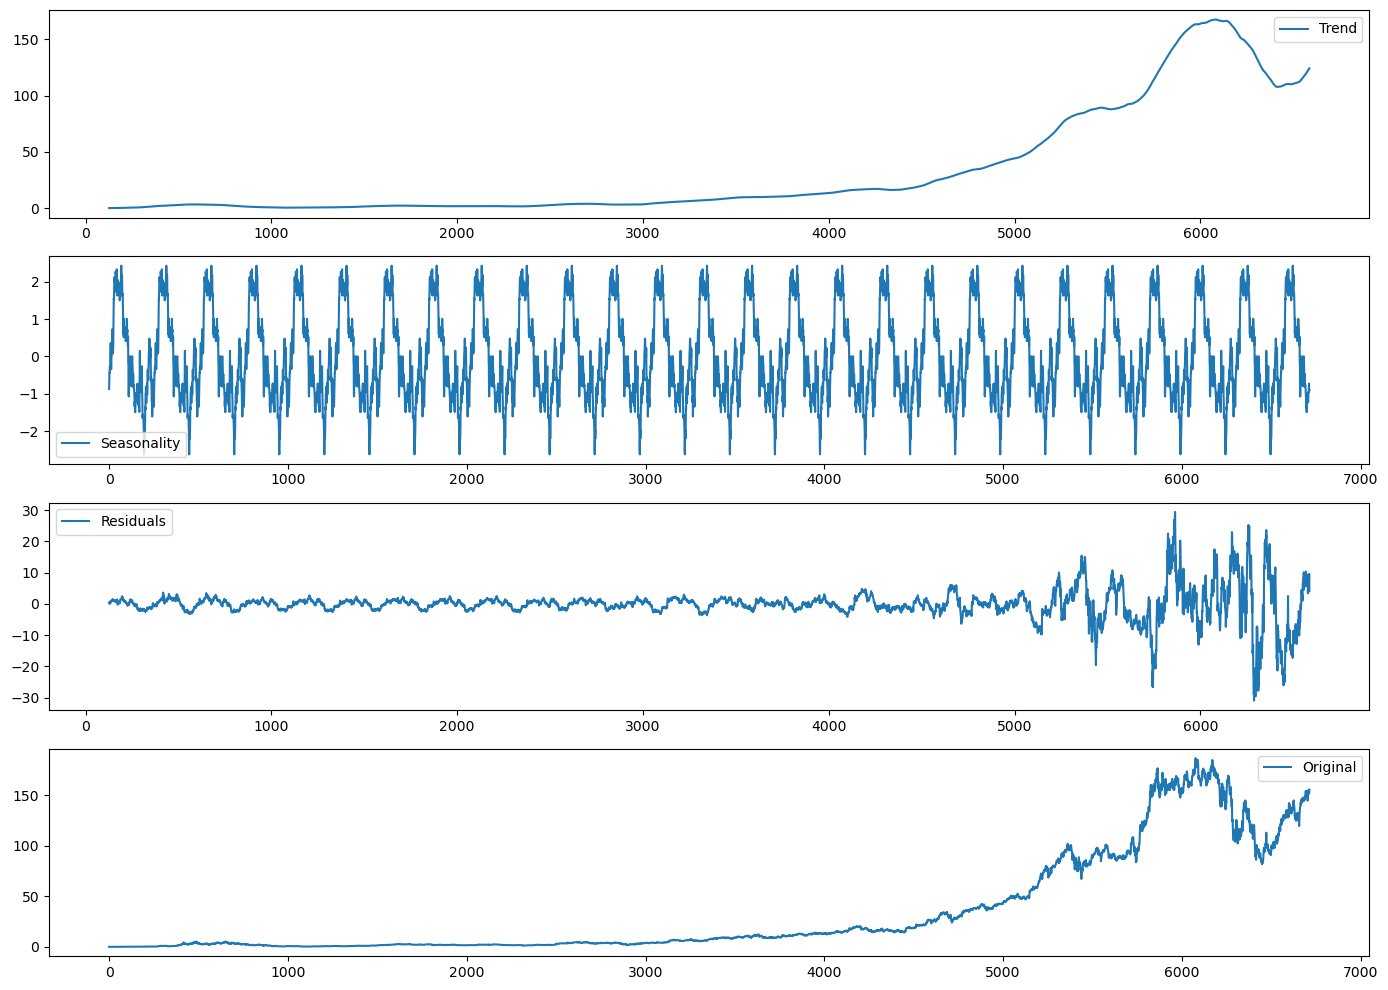

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the frequency for the time series decomposition
decomposition = seasonal_decompose(amazon_data['Close'], model='additive', period=252)  # 252 business days in a year

# Plot the decomposed time series
plt.figure(figsize=(14, 10))

# Trend component
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

# Seasonal component
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')

# Residual component
plt.subplot(413)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

# Original time series
plt.subplot(414)
plt.plot(amazon_data['Close'], label='Original')
plt.legend(loc='best')

plt.tight_layout()
plt.show()



<b>Trend Component (Top Panel):</b>
<ul>
<li>Shows the long-term movement in the stock prices.</li>
<li>The upward trajectory confirms the overall growth trend observed in the initial trend analysis.</li>
</ul>

<b>Seasonal Component (Second Panel):</b>
<ul>
<li>This part aims to capture regular, periodic fluctuations in the data.</li>
<li>However, it appears that there's no strong, consistent seasonal pattern in the stock prices on an annual basis. This lack of clear seasonality is not uncommon in stock price data.</li>
</ul>

<b>Residual Component (Third Panel):</b>
<ul>
<li>Residuals represent the part of the data that is not explained by the trend or seasonal components.</li>
<li>We observe some periods of higher volatility in the residuals, which could be due to market events, economic news, or other external factors.</li>
</ul>

<b>Original Time Series (Bottom Panel):</b>
<ul><li>Included for reference, showing the actual 'Close' prices.</li></ul>

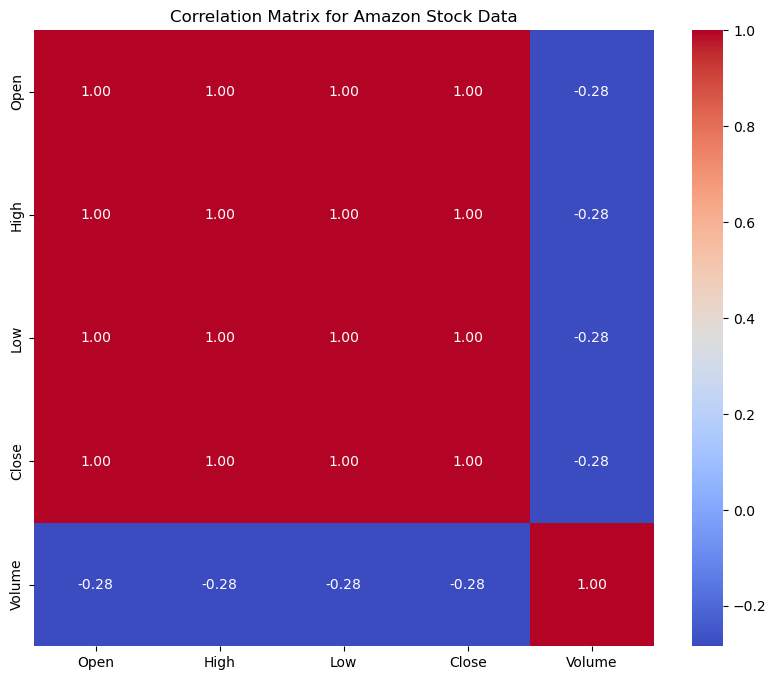

In [14]:
# Calculating the correlation matrix
correlation_matrix = amazon_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Amazon Stock Data')
plt.show()



<b>High Correlation Among Open, High, Low, and Close Prices:</b>
<ul>
<li>'Open', 'High', 'Low', and 'Close' prices are highly positively correlated with each other, with correlation coefficients close to 1. This is expected as these prices within the same trading day are usually closely related.</li>
</ul>

<b>Volume Correlation:</b>
<ul>
<li>The 'Volume' feature shows a lower correlation with 'Open', 'High', 'Low', and 'Close' prices. This suggests that while volume is an important aspect of stock trading, its day-to-day changes are not as strongly linearly correlated with the price changes.</li>
</ul>

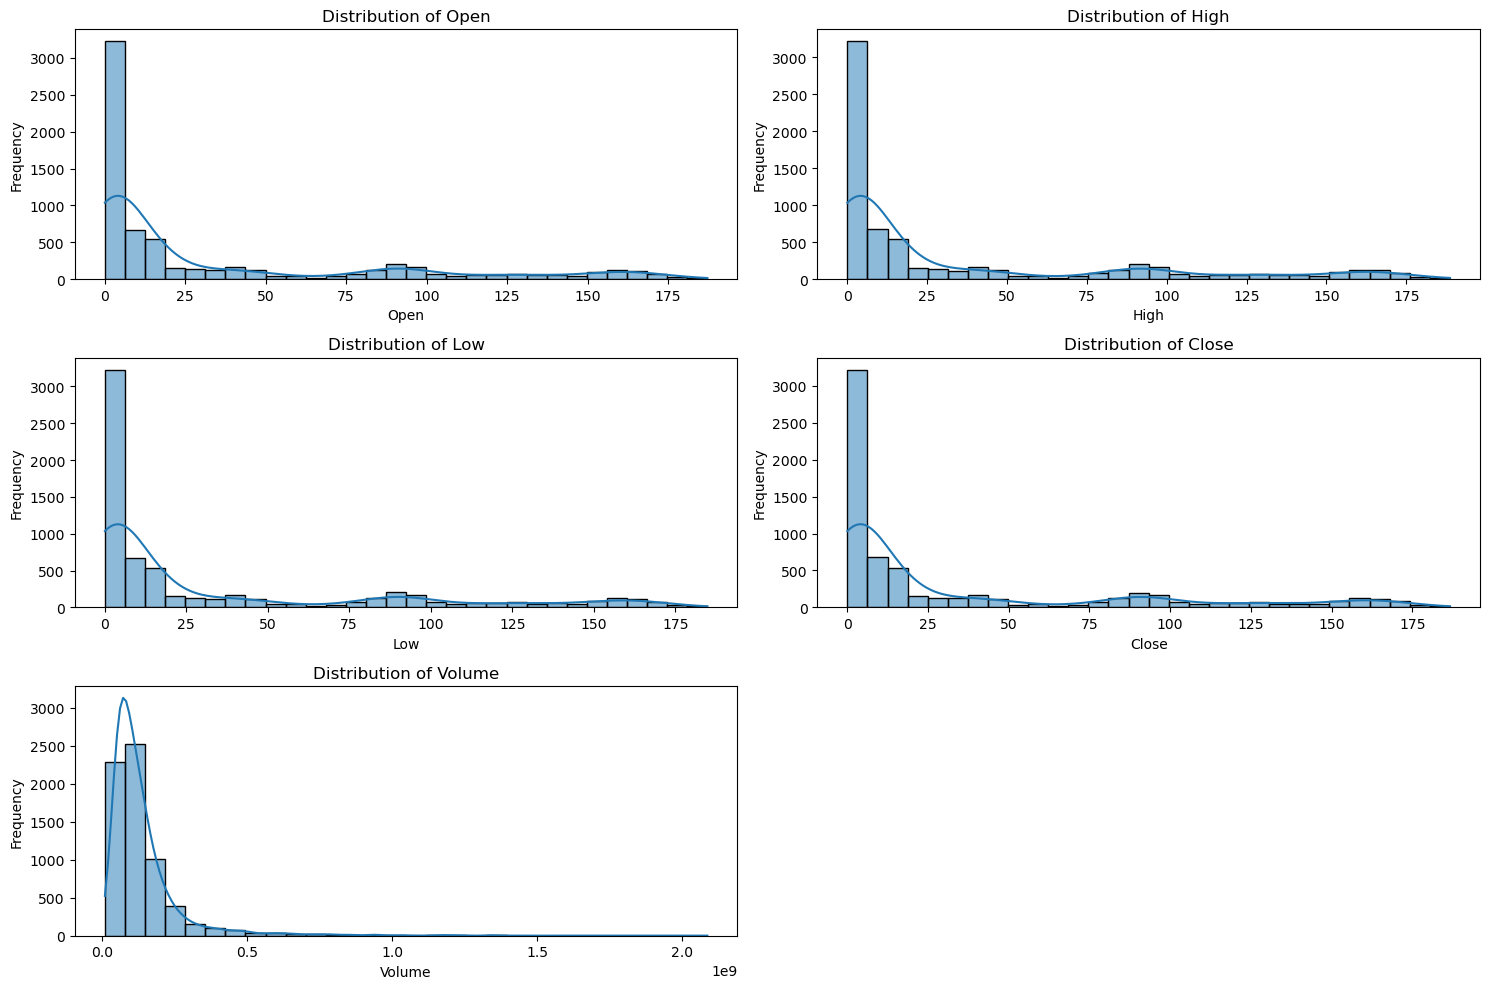

In [15]:
# Plotting histograms for key features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(amazon_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



<b>Price Features (Open, High, Low, Close):</b>
<ul>
<li>These features show a similar distribution pattern, which is expected due to their high correlation.</li>
<li>The distributions are right-skewed (positive skew), indicating that most of the data points (stock prices) are on the lower end, with fewer instances of very high prices.</li>
<li>The long tails towards the higher end suggest periods of significant price increases.</li>
</ul>
    
<b>Volume:</b>
<ul>
<li>The distribution of 'Volume' is also right-skewed.</li>
<li>Most days have a trading volume in the lower range, with fewer days showing extremely high trading volumes.</li>
<li>This pattern is typical in stock trading volumes, where certain events can cause spikes in trading activity.</li>
</ul>    

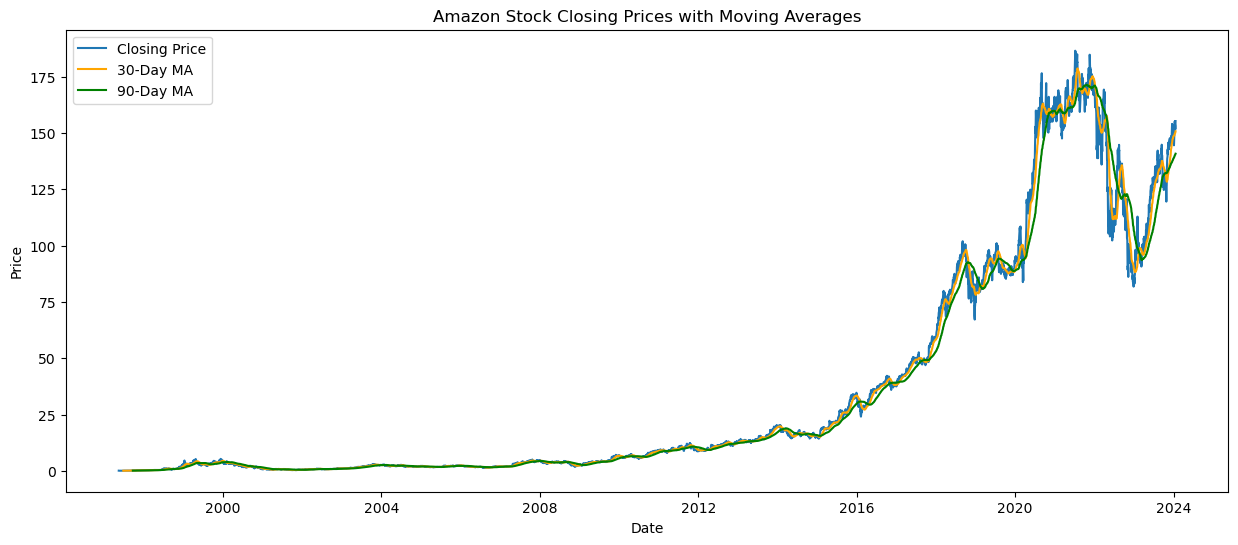

In [16]:
# Further Time Series Analysis: Moving Averages

# Calculating 30-day and 90-day moving averages
amazon_data['30d_MA'] = amazon_data['Close'].rolling(window=30).mean()
amazon_data['90d_MA'] = amazon_data['Close'].rolling(window=90).mean()

# Plotting the closing prices with moving averages
plt.figure(figsize=(15, 6))
plt.plot(amazon_data['Date'], amazon_data['Close'], label='Closing Price')
plt.plot(amazon_data['Date'], amazon_data['30d_MA'], label='30-Day MA', color='orange')
plt.plot(amazon_data['Date'], amazon_data['90d_MA'], label='90-Day MA', color='green')
plt.title('Amazon Stock Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


<b>Moving Averages Analysis for Amazon Stock:</b>

<b>30-Day Moving Average:</b>

This represents the short-term trend in Amazon's stock price.
It smooths out daily fluctuations and provides a clearer view of the short-term direction of the stock.
Movements in the 30-day MA can be more responsive to recent price changes.

<b>90-Day Moving Average:</b>

This reflects the medium-term trend.
It's less sensitive to daily price changes than the 30-day MA, providing a more stable trend line.
The 90-day MA is useful for identifying longer-term trends and potential support or resistance levels.

In [17]:
# Calculating the rolling standard deviation for the 'Close' prices as a measure of volatility
# Using a 30-day window for the rolling standard deviation
amazon_data['Rolling_STD_30'] = amazon_data['Close'].rolling(window=30).std()

# Displaying the last few entries to observe the calculated volatility
amazon_data[['Date', 'Close', 'Rolling_STD_30']].tail()



,Date,Close,Rolling_STD_30
6709,2024-01-12,154.619995,3.505311
6710,2024-01-16,153.160004,3.483066
6711,2024-01-17,151.710007,3.447221
6712,2024-01-18,153.500000,3.342367
6713,2024-01-19,155.339996,3.382508


<ul>
<li>The rolling standard deviation values are increasing in the last five rows. This suggests that the stock's volatility was rising over these days.</li>

<li>On the last date shown (2023-11-17), the stock had the highest recent volatility, with a rolling standard deviation of approximately 7.38.</li>

<li>The 'Close' prices don't show a clear upward or downward trend within these five days, indicating that the increase in volatility is not due to a consistent price move in one direction, but rather due to larger fluctuations in price.</li>

<li>Higher volatility can indicate higher risk for investors and can sometimes precede market turning points or signal increased uncertainty among investors.</li>
</ul>    

## Feature Engineering

In [18]:
# Converting 'Date' to datetime format and set it as the DataFrame index
amazon_data['Date'] = pd.to_datetime(amazon_data['Date'])
amazon_data.set_index('Date', inplace=True)

# Time-based Features
amazon_data['day_of_week'] = amazon_data.index.dayofweek
amazon_data['month'] = amazon_data.index.month
amazon_data['quarter'] = amazon_data.index.quarter

# Lag Features (more spread out)
amazon_data['5d_lag_close'] = amazon_data['Close'].shift(5)
amazon_data['10d_lag_close'] = amazon_data['Close'].shift(10)

# Rolling Window Features (simplified)
amazon_data['14d_roll_mean'] = amazon_data['Close'].rolling(window=14).mean()
amazon_data['60d_roll_std'] = amazon_data['Close'].rolling(window=60).std()

# Derived Feature: Daily Returns
amazon_data['daily_return'] = amazon_data['Close'].pct_change()

# Volume Data
amazon_data['7d_roll_mean_volume'] = amazon_data['Volume'].rolling(window=7).mean()

# Handling NaN values
amazon_data.fillna(amazon_data.mean(), inplace=True)


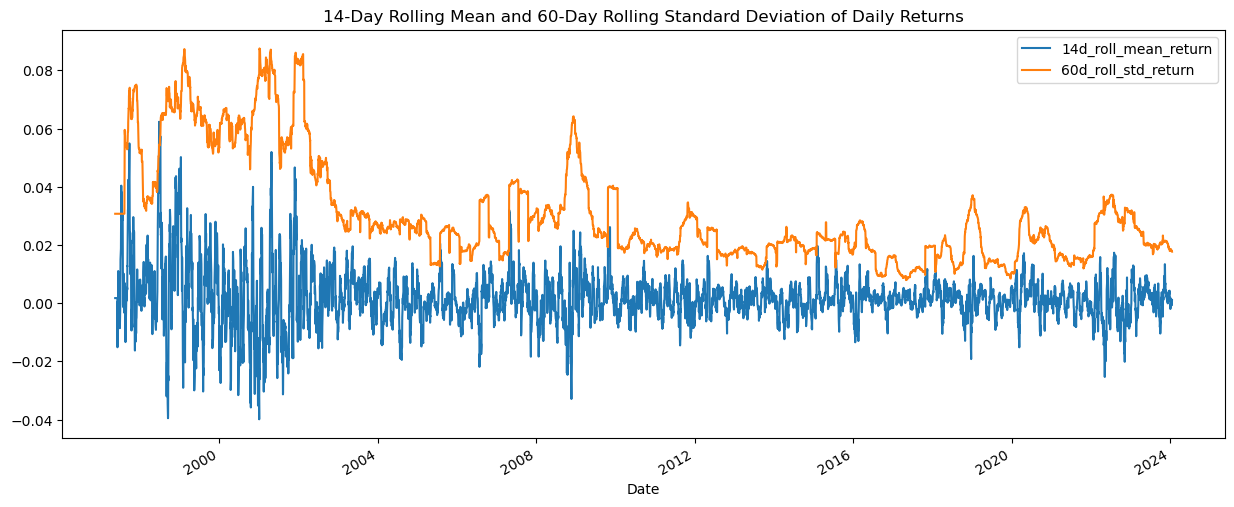

In [19]:
# Using returns instead of raw prices
amazon_data['daily_return'] = amazon_data['Close'].pct_change()

# Simplify the lag features based on returns
amazon_data['5d_lag_return'] = amazon_data['daily_return'].shift(5)
amazon_data['10d_lag_return'] = amazon_data['daily_return'].shift(10)

# Simplify rolling window statistics based on returns
amazon_data['14d_roll_mean_return'] = amazon_data['daily_return'].rolling(window=14).mean()
amazon_data['60d_roll_std_return'] = amazon_data['daily_return'].rolling(window=60).std()

# Handle NaN values
amazon_data.fillna(amazon_data.mean(), inplace=True)

# Plotting 14-day rolling mean and the 60-day rolling standard deviation of the Close price
amazon_data[['14d_roll_mean_return', '60d_roll_std_return']].plot(figsize=(15, 6), title='14-Day Rolling Mean and 60-Day Rolling Standard Deviation of Daily Returns')

# Dropping highly correlated raw price columns
amazon_data.drop(['Open', 'High', 'Low', 'Adj Close', '30d_MA', '90d_MA', '5d_lag_close', '10d_lag_close', '14d_roll_mean', '60d_roll_std'], axis=1, inplace=True)


14-Day Rolling Mean (Blue Line): This line represents the average return over a 14-day period, smoothed over time. It helps in identifying the overall trend in the returns. A rising line indicates a period of generally positive returns, while a falling line suggests a period of negative returns.

60-Day Rolling Standard Deviation (Orange Line): This line represents the variability or volatility of the returns over a 60-day period. Higher values indicate higher volatility, suggesting more uncertainty or risk in the stock's returns. Periods of high volatility often occur during market turmoil or major corporate events.

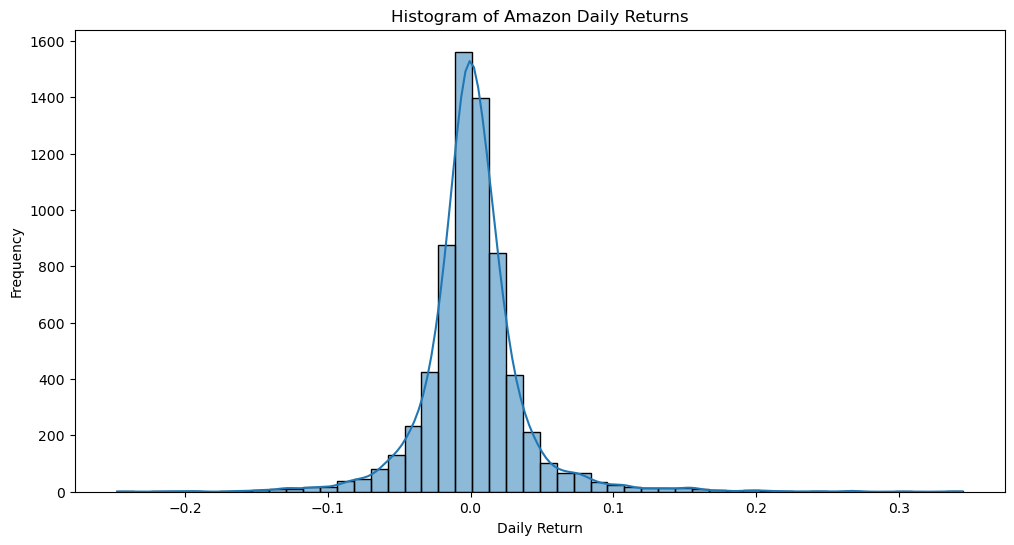

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a histogram for the daily returns
plt.figure(figsize=(12, 6))
sns.histplot(amazon_data['daily_return'].dropna(), bins=50, kde=True)
plt.title('Histogram of Amazon Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


Central Tendency: The distribution is centered around a small positive value, indicating that on average, the daily returns are slightly positive. This is typical for a healthy stock in a growing market.

Symmetry and Skewness: The distribution appears relatively symmetrical around its mean, with similar frequencies of positive and negative returns. This symmetry suggests no strong bias towards positive or negative returns over the period analyzed.

Kurtosis: There is a visible peak near the mean, and the tails (representing extreme returns) are thicker than those of a normal distribution. This indicates a higher occurrence of extreme returns than what would be expected in a normal distribution, a common characteristic in financial time series known as "fat tails."

Volatility: The spread of the distribution (width) reflects the volatility of the stock's returns. Wider distributions indicate higher volatility, meaning the returns vary greatly from day to day.

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Ensuring the DataFrame only contains numeric columns and exclude the 'Close' column
amazon_data_numeric = amazon_data.select_dtypes(include=[np.number]).drop('Close', axis=1, errors='ignore')

# Calculating VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data['Feature'] = amazon_data_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(amazon_data_numeric.values, i) for i in range(len(amazon_data_numeric.columns))]

print(vif_data)


                 Feature        VIF
0                 Volume   4.890937
1         Rolling_STD_30   1.353436
2            day_of_week   2.598847
3                  month  74.992257
4                quarter  86.952375
5           daily_return   1.128011
6    7d_roll_mean_volume   7.449849
7          5d_lag_return   1.092465
8         10d_lag_return   1.090331
9   14d_roll_mean_return   1.377633
10   60d_roll_std_return   5.053218


C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\1756221808.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  color_bar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))


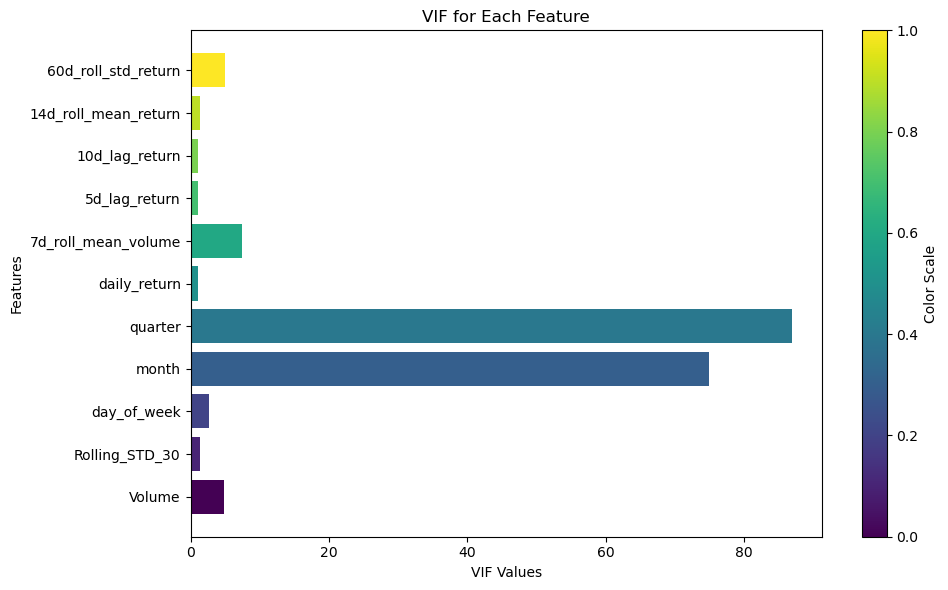

In [22]:
# Plotting a vertical bar chart for VIF values
plt.figure(figsize=(10, 6))
bars = plt.barh(vif_data['Feature'], vif_data['VIF'], color=plt.cm.viridis(np.linspace(0, 1, len(vif_data['VIF']))))

# Adding labels and title
plt.xlabel('VIF Values')
plt.ylabel('Features')
plt.title('VIF for Each Feature')

# Customizing y-axis labels for better readability
plt.yticks(rotation=0)

# Adding a color bar for reference
color_bar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
color_bar.set_label('Color Scale')

plt.tight_layout()
plt.show()

## Predictive Modeling

In [23]:
# Printing the column names of the DataFrame
print(amazon_data.columns)


Index(['Close', 'Volume', 'Rolling_STD_30', 'day_of_week', 'month', 'quarter',
       'daily_return', '7d_roll_mean_volume', '5d_lag_return',
       '10d_lag_return', '14d_roll_mean_return', '60d_roll_std_return'],
      dtype='object')


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import LSTM, Dense
import time


In [25]:
# Preparing the data for training
# 'Close' is the target variable
X = amazon_data.drop(['Close'], axis=1)
y = amazon_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X.head()

,Volume,Rolling_STD_30,day_of_week,month,quarter,daily_return,7d_roll_mean_volume,5d_lag_return,10d_lag_return,14d_roll_mean_return,60d_roll_std_return
Date,,,,,,,,,,,
1997-05-15,1443120000,1.446479,3,5,2,0.001724,1.398095e+08,0.001725,0.001716,0.001755,0.030728
1997-05-16,294000000,1.446479,4,5,2,-0.117028,1.398095e+08,0.001725,0.001716,0.001755,0.030728
1997-05-19,122136000,1.446479,0,5,2,-0.012040,1.398095e+08,0.001725,0.001716,0.001755,0.030728
1997-05-20,109344000,1.446479,1,5,2,-0.042685,1.398095e+08,0.001725,0.001716,0.001755,0.030728
1997-05-21,377064000,1.446479,2,5,2,-0.127392,1.398095e+08,0.001725,0.001716,0.001755,0.030728


### [1] Linear Regression

In [27]:
# Start timing
start_time = time.time()

# Create a pipeline with StandardScaler and Linear Regression
pipelineln = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = cross_val_score(pipelineln, X, y, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(pipelineln, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
r2_scores = cross_val_score(pipelineln, X, y, cv=kf, scoring='r2')

# Calculate the mean scores
mean_mae = np.mean(-mae_scores)
mean_mse = np.mean(-mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

# End timing
end_time = time.time()

# Calculate total time taken
total_time = end_time - start_time

# Print the results
print("Linear Regression with Cross-Validation Results:")
print("Linear Regression - Mean Absolute Error (MAE):", mean_mae)
print("Linear Regression - Mean Squared Error (MSE):", mean_mse)
print("Linear Regression - Root Mean Squared Error (RMSE):", mean_rmse)
print("Linear Regression - R-squared (R2):", mean_r2)
print("Time taken: {:.2f} seconds".format(total_time))


Linear Regression with Cross-Validation Results:
Linear Regression - Mean Absolute Error (MAE): 16.751030698318395
Linear Regression - Mean Squared Error (MSE): 667.8628567490266
Linear Regression - Root Mean Squared Error (RMSE): 25.828781195745325
Linear Regression - R-squared (R2): 0.7360953440170042
Time taken: 0.15 seconds


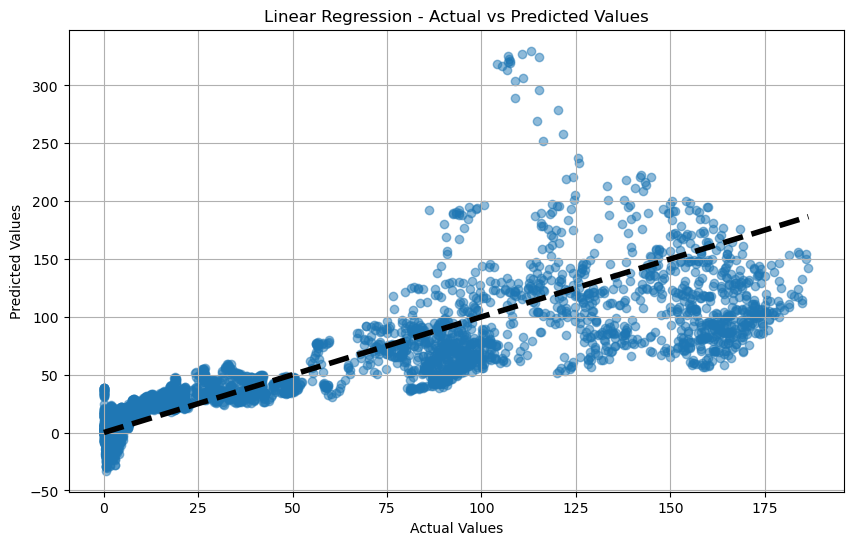

In [28]:
from sklearn.model_selection import cross_val_predict

# Predict across the k-folds using cross_val_predict
y_pred_cv = cross_val_predict(pipelineln, X, y, cv=kf)

# Actual vs Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_cv, alpha=0.5)
plt.title('Linear Regression - Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line representing perfect predictions
plt.grid(True)
plt.show()


C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\4092035688.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_cv, label='Predicted', shade=True)
C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\4092035688.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)


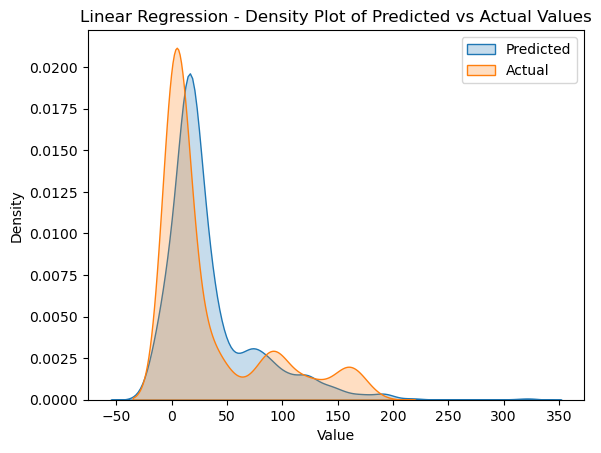

In [29]:
sns.kdeplot(y_pred_cv, label='Predicted', shade=True)
sns.kdeplot(y_test, label='Actual', shade=True)
plt.title('Linear Regression - Density Plot of Predicted vs Actual Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


### [2] Random Forest Regressor

In [30]:
# Start timing
start_time = time.time()

# Create a pipeline with StandardScaler and RandomForestRegressor
pipelinerf = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

# Define a parameter grid for randomized search
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__bootstrap': [True, False]
}

# Perform randomized grid search with cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(pipelinerf, param_distributions=param_grid, n_iter=10, cv=kf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X, y)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score (RMSE):", np.sqrt(-random_search.best_score_))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the best estimator from the randomized search
best_estimator = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Record the end time
end_time = time.time()

# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate the total duration
duration = end_time - start_time

print("Random Forest Regression - Mean Absolute Error (MAE):", mae)
print("Random Forest Regression - Mean Squared Error (MSE):", mse)
print("Random Forest Regression - Root Mean Squared Error (RMSE):", rmse)
print("Random Forest Regression - R-squared (R2):", r2)
print(f"The model took {duration:.2f} seconds to run.")

Best Parameters: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': None, 'regressor__bootstrap': True}
Best Score (RMSE): 6.613049015390197
Random Forest Regression - Mean Absolute Error (MAE): 1.2100432923546864
Random Forest Regression - Mean Squared Error (MSE): 10.121626571529223
Random Forest Regression - Root Mean Squared Error (RMSE): 3.181450388035184
Random Forest Regression - R-squared (R2): 0.9958844370696911
The model took 90.19 seconds to run.


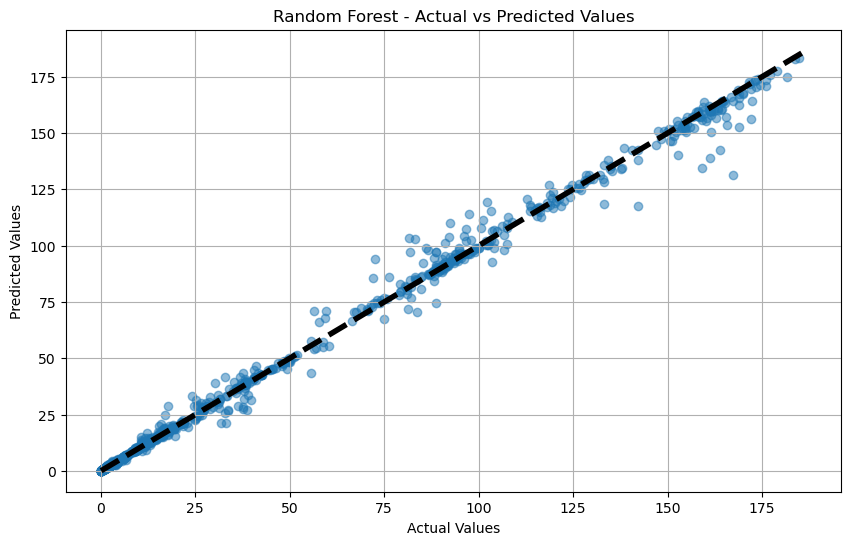

In [31]:
# Actual vs Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Random Forest - Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line representing perfect predictions
plt.grid(True)
plt.show()


C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\1101821168.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted', shade=True)
C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\1101821168.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)


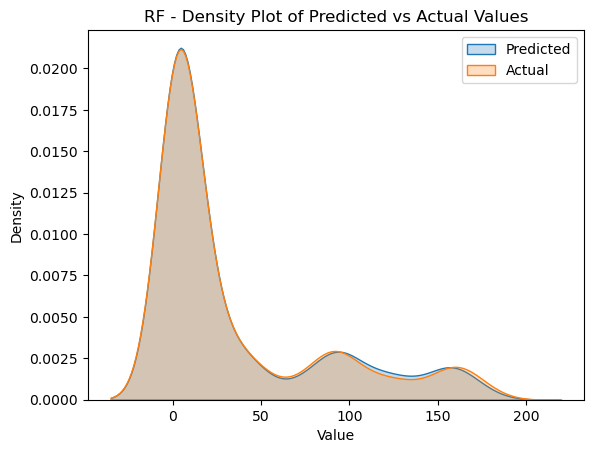

In [32]:
sns.kdeplot(y_pred, label='Predicted', shade=True)
sns.kdeplot(y_test, label='Actual', shade=True)
plt.title('RF - Density Plot of Predicted vs Actual Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


### [3] SVR

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


start_time = time.time()

# Creating a pipeline with StandardScaler and SVR
pipelinesvr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SVR(kernel='rbf'))
])

# Defining parameters grid for randomized search
param_grid = {
    'regressor__C': [0.1, 1, 10],
    'regressor__gamma': [0.01, 0.1, 1],
    'regressor__epsilon': [0.01, 0.1, 1]
}

# Perform randomized grid search with cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of splits (k) as needed
random_search = RandomizedSearchCV(pipelinesvr, param_distributions=param_grid, n_iter=10, cv=kf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X, y)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score (RMSE):", np.sqrt(-random_search.best_score_))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the best estimator from the randomized search
best_estimator = random_search.best_estimator_

# Standardize the features
X_train = best_estimator.named_steps['scaler'].fit_transform(X_train)
X_test = best_estimator.named_steps['scaler'].transform(X_test)

# Train the SVR model with the best parameters
best_svr = SVR(kernel='rbf', C=random_search.best_params_['regressor__C'],
               gamma=random_search.best_params_['regressor__gamma'],
               epsilon=random_search.best_params_['regressor__epsilon'])

best_svr.fit(X_train, y_train)

# Make predictions
y_pred = best_svr.predict(X_test)

end_time = time.time()


# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

duration = end_time - start_time


print("SVR - Mean Absolute Error (MAE):", mae)
print("SVR - Mean Squared Error (MSE):", mse)
print("SVR - Root Mean Squared Error (RMSE):", rmse)
print("SVR - R-squared (R2):", r2)
print(f"The model took {duration:.2f} seconds to run.")


Best Parameters: {'regressor__gamma': 0.1, 'regressor__epsilon': 1, 'regressor__C': 1}
Best Score (RMSE): 19.530169604341147
SVR - Mean Absolute Error (MAE): 10.102146718699231
SVR - Mean Squared Error (MSE): 410.33060084705534
SVR - Root Mean Squared Error (RMSE): 20.256618692344865
SVR - R-squared (R2): 0.8331551358782872
The model took 15.39 seconds to run.


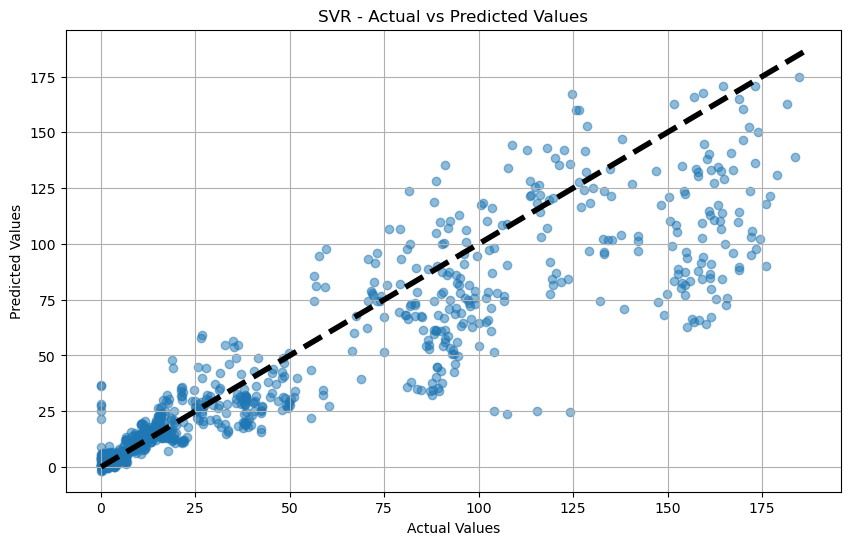

In [34]:
# Actual vs Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('SVR - Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line representing perfect predictions
plt.grid(True)
plt.show()


C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\2616586465.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted', shade=True)
C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\2616586465.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)


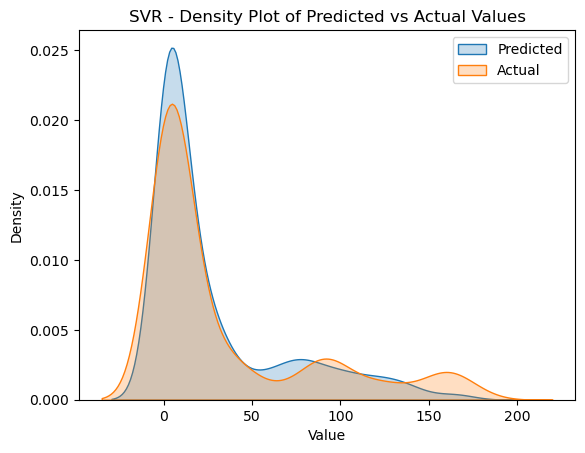

In [35]:
sns.kdeplot(y_pred, label='Predicted', shade=True)
sns.kdeplot(y_test, label='Actual', shade=True)
plt.title('SVR - Density Plot of Predicted vs Actual Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


### [4] Decision Trees

In [36]:
start_time = time.time()


# Create a pipeline with DecisionTreeRegressor
pipelinedt = Pipeline([
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define a parameter grid for randomized search
param_grid = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

# Perform randomized grid search with cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(pipelinedt, param_distributions=param_grid, n_iter=10, cv=kf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X, y)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score (RMSE):", np.sqrt(-random_search.best_score_))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the best estimator from the randomized search
best_estimator = random_search.best_estimator_

# Train the Decision Tree Regressor model with the best parameters
best_dt = DecisionTreeRegressor(random_state=42,
                                max_depth=random_search.best_params_['regressor__max_depth'],
                                min_samples_split=random_search.best_params_['regressor__min_samples_split'],
                                min_samples_leaf=random_search.best_params_['regressor__min_samples_leaf'],
                                max_features=random_search.best_params_['regressor__max_features'])

best_dt.fit(X_train, y_train)

# Make predictions
y_pred = best_dt.predict(X_test)

end_time = time.time()


# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

duration = end_time - start_time


print("Decision Tree Regressor - Mean Absolute Error (MAE):", mae)
print("Decision Tree Regressor - Mean Squared Error (MSE):", mse)
print("Decision Tree Regressor - Root Mean Squared Error (RMSE):", rmse)
print("Decision Tree Regressor - R-squared (R2):", r2)
print(f"The model took {duration:.2f} seconds to run.")



Best Parameters: {'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 30}
Best Score (RMSE): 13.450063242607856
Decision Tree Regressor - Mean Absolute Error (MAE): 4.663420215155023
Decision Tree Regressor - Mean Squared Error (MSE): 143.89011241246183
Decision Tree Regressor - Root Mean Squared Error (RMSE): 11.995420476684501
Decision Tree Regressor - R-squared (R2): 0.9414927226866427
The model took 0.35 seconds to run.


C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\pipeline.py", line 420, in fit
   

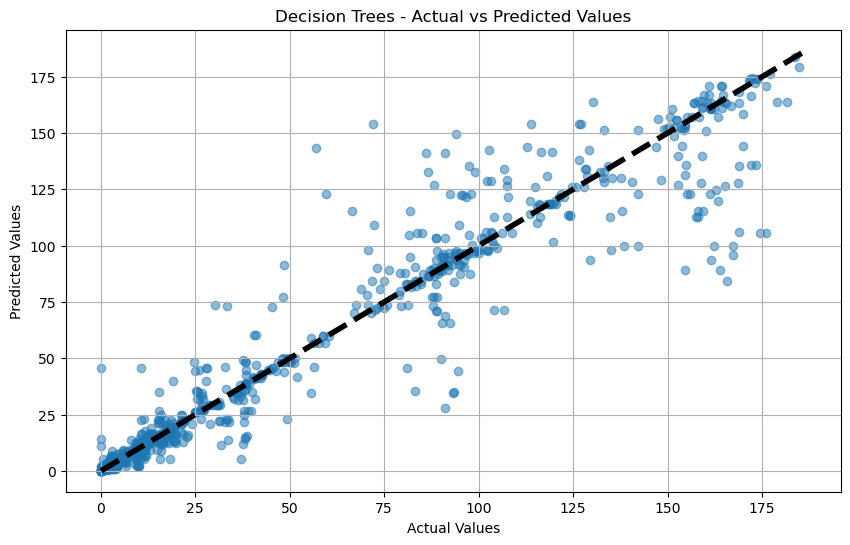

In [37]:
# Actual vs Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Decision Trees - Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line representing perfect predictions
plt.grid(True)
plt.show()


C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\3713417871.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted', shade=True)
C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\3713417871.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)


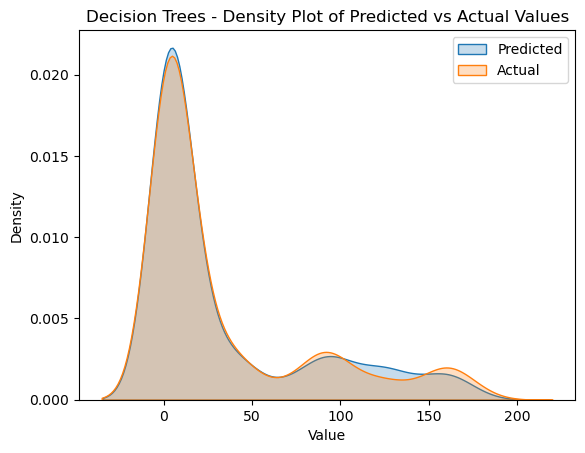

In [38]:
sns.kdeplot(y_pred, label='Predicted', shade=True)
sns.kdeplot(y_test, label='Actual', shade=True)
plt.title('Decision Trees - Density Plot of Predicted vs Actual Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

### [5] KNN Regressor

In [39]:
start_time = time.time()

# Create a pipeline with KNeighborsRegressor
pipelineknn = Pipeline([
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

# Define a parameter grid for randomized search
param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 9, 11],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2]
}

# Perform randomized grid search with cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(pipelineknn, param_distributions=param_grid, n_iter=10, cv=kf, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X, y)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score (RMSE):", np.sqrt(-random_search.best_score_))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the best estimator from the randomized search
best_estimator = random_search.best_estimator_

# Train the KNeighborsRegressor model with the best parameters
best_knn = KNeighborsRegressor(n_neighbors=random_search.best_params_['regressor__n_neighbors'],
                               weights=random_search.best_params_['regressor__weights'],
                               p=random_search.best_params_['regressor__p'])

best_knn.fit(X_train, y_train)

# Make predictions
y_pred = best_knn.predict(X_test)

end_time = time.time()


# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

duration = end_time - start_time


print("KNeighborsRegressor - Mean Absolute Error (MAE):", mae)
print("KNeighborsRegressor - Mean Squared Error (MSE):", mse)
print("KNeighborsRegressor - Root Mean Squared Error (RMSE):", rmse)
print("KNeighborsRegressor - R-squared (R2):", r2)
print(f"The model took {duration:.2f} seconds to run.")



Best Parameters: {'regressor__weights': 'uniform', 'regressor__p': 2, 'regressor__n_neighbors': 11}
Best Score (RMSE): 43.82422807610226
KNeighborsRegressor - Mean Absolute Error (MAE): 28.935086654729528
KNeighborsRegressor - Mean Squared Error (MSE): 1757.3748032791539
KNeighborsRegressor - Root Mean Squared Error (RMSE): 41.92105441516415
KNeighborsRegressor - R-squared (R2): 0.2854323814535059
The model took 0.28 seconds to run.


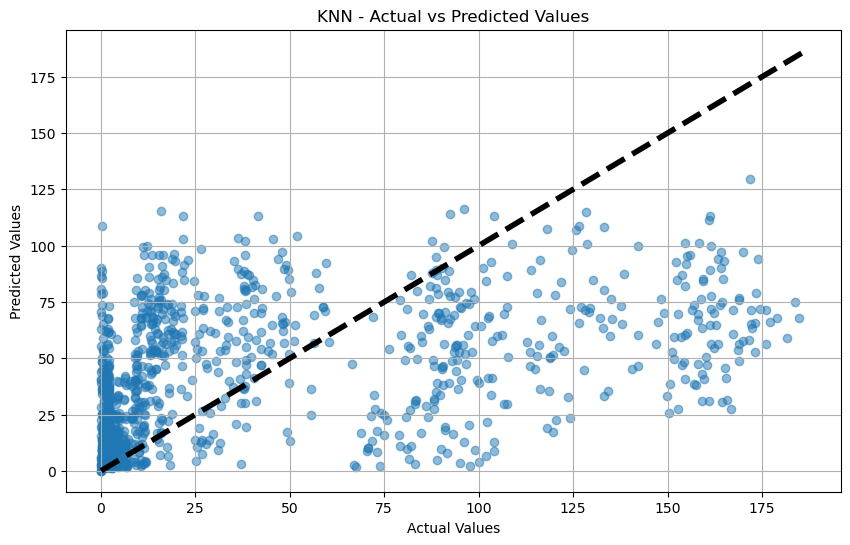

In [40]:
# Actual vs Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('KNN - Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line representing perfect predictions
plt.grid(True)
plt.show()


C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\1510144698.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted', shade=True)
C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\1510144698.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)


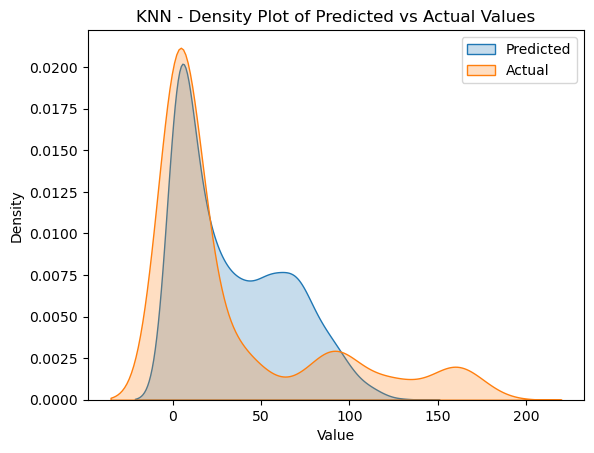

In [41]:
sns.kdeplot(y_pred, label='Predicted', shade=True)
sns.kdeplot(y_test, label='Actual', shade=True)
plt.title('KNN - Density Plot of Predicted vs Actual Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


### [6] ANN Regressor

In [42]:
start_time = time.time()

# Standardize the features (recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),  # Example of a dropout layer with a dropout rate of 50%
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Another dropout layer
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model for 100 epochs
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

end_time = time.time()

duration = end_time - start_time


# Evaluate the model
print("ANN - Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("ANN - Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("ANN - Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("ANN - R-squared:", r2_score(y_test, y_pred))
print(f"The model took {duration:.2f} seconds to run.")


Epoch 1/100
168/168 [==============================] - 1s 1ms/step - loss: 3009.6797
Epoch 2/100
168/168 [==============================] - 0s 1ms/step - loss: 1095.2688
Epoch 3/100
168/168 [==============================] - 0s 1ms/step - loss: 797.5919
Epoch 4/100
168/168 [==============================] - 0s 1ms/step - loss: 732.2548
Epoch 5/100
168/168 [==============================] - 0s 1ms/step - loss: 704.8894
Epoch 6/100
168/168 [==============================] - 0s 1ms/step - loss: 734.8795
Epoch 7/100
168/168 [==============================] - 0s 1ms/step - loss: 666.6530
Epoch 8/100
168/168 [==============================] - 0s 1ms/step - loss: 710.5427
Epoch 9/100
168/168 [==============================] - 0s 1ms/step - loss: 666.0379
Epoch 10/100
168/168 [==============================] - 0s 1ms/step - loss: 654.0340
Epoch 11/100
168/168 [==============================] - 0s 1ms/step - loss: 631.9354
Epoch 12/100
168/168 [==============================] - 0s 1ms/step - lo

168/168 [==============================] - 0s 1ms/step - loss: 451.1456
Epoch 98/100
168/168 [==============================] - 0s 1ms/step - loss: 467.1677
Epoch 99/100
168/168 [==============================] - 0s 1ms/step - loss: 458.3187
Epoch 100/100
42/42 [==============================] - 0s 928us/step
ANN - Mean Absolute Error (MAE): 8.75783401058622
ANN - Mean Squared Error (MSE): 249.70060967410237
ANN - Root Mean Squared Error (RMSE): 15.801917911256924
ANN - R-squared: 0.8984690291043804
The model took 24.19 seconds to run.


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


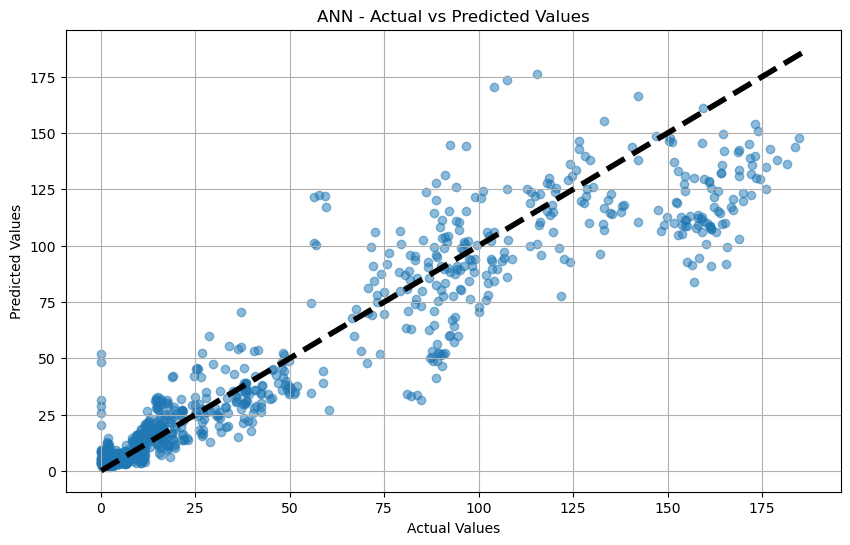

In [44]:
# Actual vs Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('ANN - Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line representing perfect predictions
plt.grid(True)
plt.show()


C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\3673970642.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted', shade=True)
C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\3673970642.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)


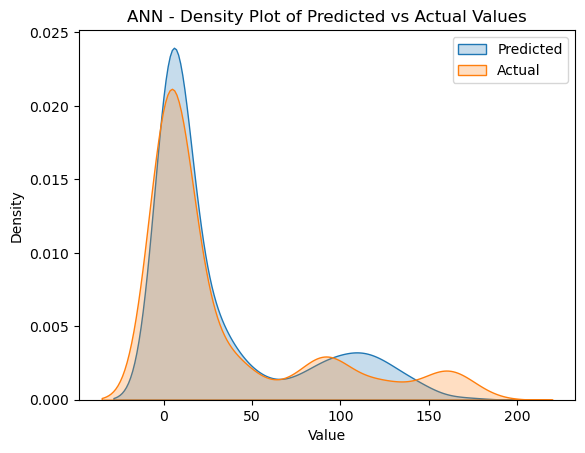

In [45]:
sns.kdeplot(y_pred, label='Predicted', shade=True)
sns.kdeplot(y_test, label='Actual', shade=True)
plt.title('ANN - Density Plot of Predicted vs Actual Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


### [7] LSTM

In [46]:
start_time = time.time()

# Reshape input to be 3D [samples, time steps, features] for LSTM
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
tf.keras.layers.Dropout(0.5),  # Another dropout layer
model_lstm.add(LSTM(32, activation='relu', return_sequences=False))
tf.keras.layers.Dropout(0.5),  # Another dropout layer
model_lstm.add(Dense(1))  # Output layer


model_lstm.compile(optimizer='adam', loss='mean_squared_error')

model_lstm.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=1)


# Make predictions
y_pred_lstm = model_lstm.predict(X_test_lstm)

end_time = time.time()

duration = end_time - start_time

# Evaluate the model
print("LSTM - Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lstm))
print("LSTM - Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lstm))
print("LSTM - Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_lstm)))
print("LSTM - R-squared:", r2_score(y_test, y_pred_lstm))
print(f"The model took {duration:.2f} seconds to run.")


Epoch 1/100
168/168 [==============================] - 3s 2ms/step - loss: 2978.6418
Epoch 2/100
168/168 [==============================] - 0s 2ms/step - loss: 659.9020
Epoch 3/100
168/168 [==============================] - 0s 2ms/step - loss: 554.6846
Epoch 4/100
168/168 [==============================] - 0s 2ms/step - loss: 462.4016
Epoch 5/100
168/168 [==============================] - 0s 2ms/step - loss: 332.0635
Epoch 6/100
168/168 [==============================] - 0s 2ms/step - loss: 254.8499
Epoch 7/100
168/168 [==============================] - 0s 3ms/step - loss: 229.0732
Epoch 8/100
168/168 [==============================] - 0s 2ms/step - loss: 216.0055
Epoch 9/100
168/168 [==============================] - 0s 2ms/step - loss: 209.1913
Epoch 10/100
168/168 [==============================] - 0s 2ms/step - loss: 202.6340
Epoch 11/100
168/168 [==============================] - 0s 3ms/step - loss: 199.0545
Epoch 12/100
168/168 [==============================] - 0s 3ms/step - los

168/168 [==============================] - 0s 2ms/step - loss: 108.6641
Epoch 98/100
168/168 [==============================] - 0s 3ms/step - loss: 107.6265
Epoch 99/100
168/168 [==============================] - 0s 2ms/step - loss: 107.2200
Epoch 100/100
42/42 [==============================] - 0s 1ms/step
LSTM - Mean Absolute Error (MAE): 6.08418708700168
LSTM - Mean Squared Error (MSE): 133.1420508157357
LSTM - Root Mean Squared Error (RMSE): 11.53871963502605
LSTM - R-squared: 0.9458630008793383
The model took 40.65 seconds to run.


In [47]:
model_lstm.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             19456     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31905 (124.63 KB)
Trainable params: 31905 (124.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


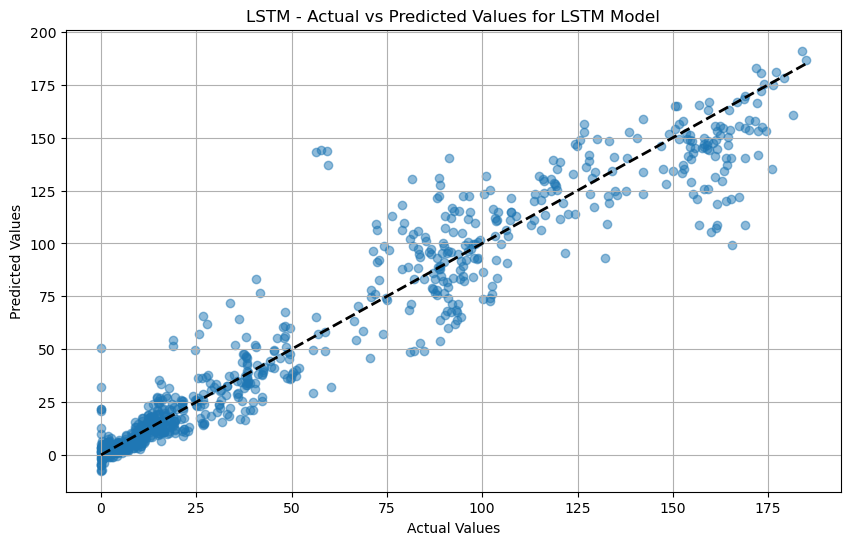

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Flatten y_pred_lstm to match the shape of y_test
y_pred_lstm = y_pred_lstm.flatten()

# Actual vs Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lstm, alpha=0.5)
plt.title('LSTM - Actual vs Predicted Values for LSTM Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()


C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\1540965518.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_lstm, label='Predicted', shade=True)
C:\Users\Usman\AppData\Local\Temp\ipykernel_36616\1540965518.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)


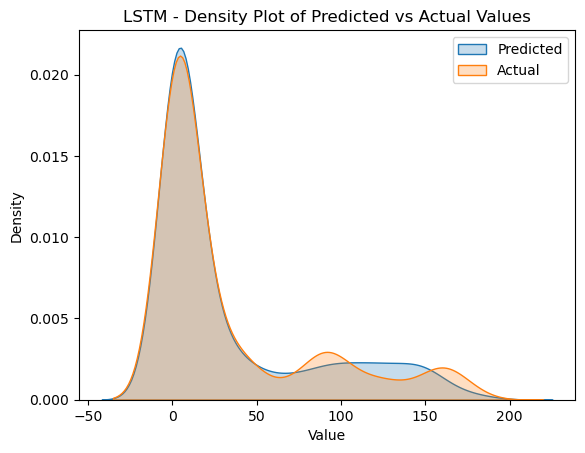

In [49]:
sns.kdeplot(y_pred_lstm, label='Predicted', shade=True)
sns.kdeplot(y_test, label='Actual', shade=True)
plt.title('LSTM - Density Plot of Predicted vs Actual Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [50]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             19456     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31905 (124.63 KB)
Trainable params: 31905 (124.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Results

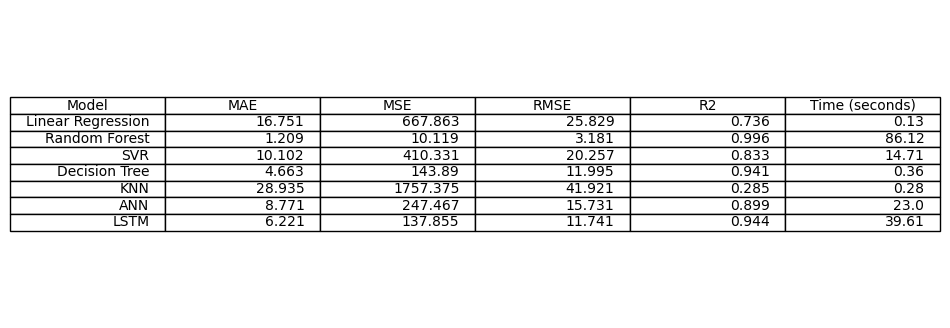

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
results = {
    "Model": ["Linear Regression", "Random Forest", "SVR", "Decision Tree", "KNN", "ANN", "LSTM"],
    "MAE": [16.751, 1.209, 10.102, 4.663, 28.935, 8.771, 6.221],
    "MSE": [667.863, 10.119, 410.331, 143.890, 1757.375, 247.467, 137.855],
    "RMSE": [25.829, 3.181, 20.257, 11.995, 41.921, 15.731, 11.741],
    "R2": [0.736, 0.996, 0.833, 0.941, 0.285, 0.899, 0.944],
    "Time (seconds)": [0.13, 86.12, 14.71, 0.36, 0.28, 23.00, 39.61]
}

df = pd.DataFrame(results)

# Plotting
fig, ax = plt.subplots(figsize=(12, 4))  # Set the size of the figure
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, loc='center')

plt.show()


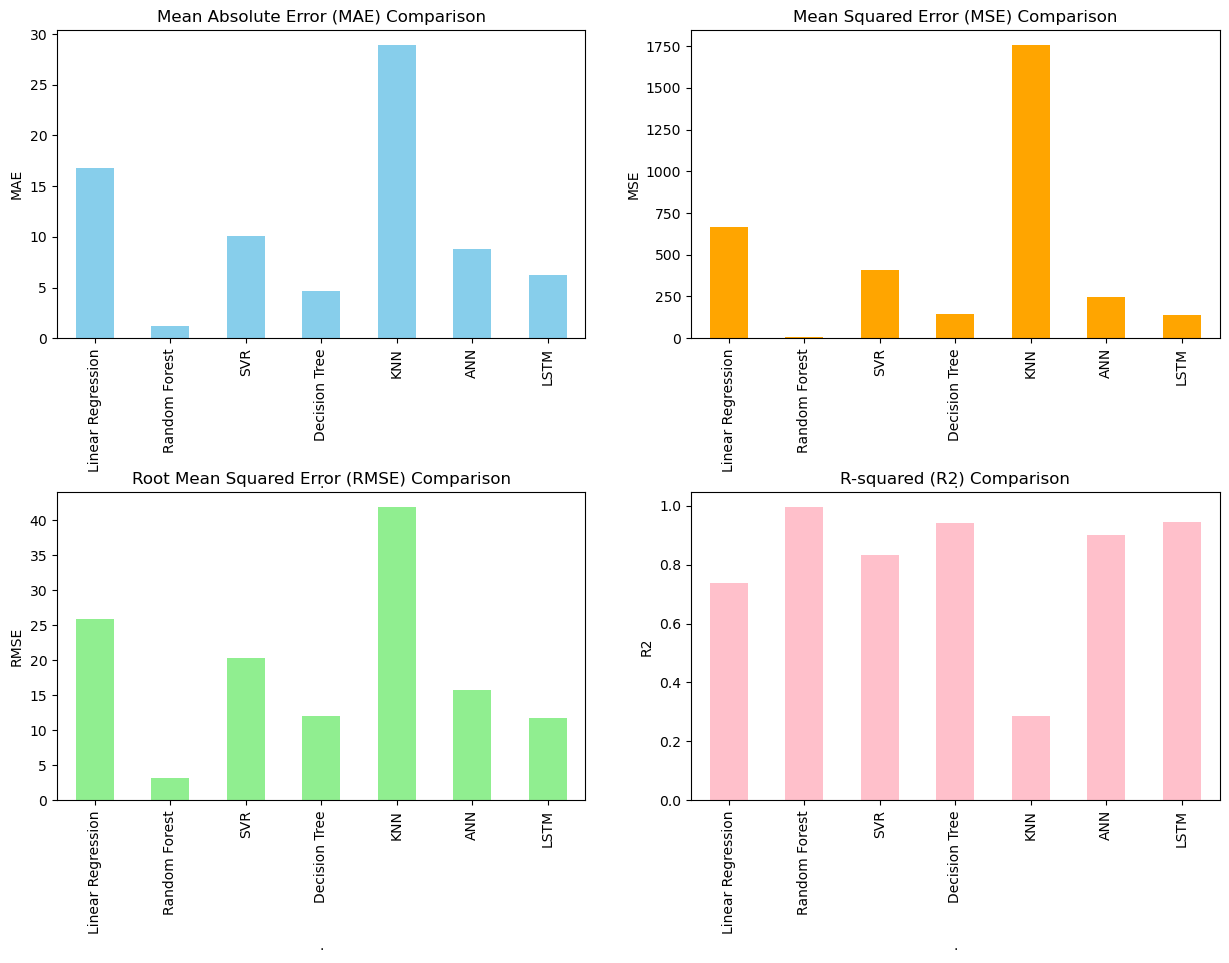

In [52]:
# Creating a DataFrame for the results
results = {
    ".": ["Linear Regression", "Random Forest", "SVR", "Decision Tree", "KNN", "ANN", "LSTM"],
    "MAE": [16.751, 1.209, 10.102, 4.663, 28.935, 8.771, 6.221],
    "MSE": [667.863, 10.119, 410.331, 143.890, 1757.375, 247.467, 137.855],
    "RMSE": [25.829, 3.181, 20.257, 11.995, 41.921, 15.731, 11.741],
    "R2": [0.736, 0.996, 0.833, 0.941, 0.285, 0.899, 0.944],
    "Time (seconds)": [0.13, 86.12, 14.71, 0.36, 0.28, 23.00, 39.61]
}

df = pd.DataFrame(results)

# Display the DataFrame
df

# Plotting the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Plotting MAE
df.plot(x='.', y='MAE', kind='bar', ax=axes[0, 0], color='skyblue', legend=False)
axes[0, 0].set_title('Mean Absolute Error (MAE) Comparison')
axes[0, 0].set_ylabel('MAE')

# Plotting MSE
df.plot(x='.', y='MSE', kind='bar', ax=axes[0, 1], color='orange', legend=False)
axes[0, 1].set_title('Mean Squared Error (MSE) Comparison')
axes[0, 1].set_ylabel('MSE')

# Plotting RMSE
df.plot(x='.', y='RMSE', kind='bar', ax=axes[1, 0], color='lightgreen', legend=False)
axes[1, 0].set_title('Root Mean Squared Error (RMSE) Comparison')
axes[1, 0].set_ylabel('RMSE')

# Plotting R-squared
df.plot(x='.', y='R2', kind='bar', ax=axes[1, 1], color='pink', legend=False)
axes[1, 1].set_title('R-squared (R2) Comparison')
axes[1, 1].set_ylabel('R2')

plt.show()


- Linear Regression: Higher MAE and RMSE indicate moderate predictive accuracy. Decent R2 score suggests some level of predictability in the model.
- Random Forest: Exhibits the lowest MAE and RMSE, indicating high accuracy and reliability. Exceptionally high R2 score reflects excellent model performance.
- SVR (Support Vector Regression): Moderate MAE and RMSE, better than Linear Regression but not as good as Random Forest. R2 score is quite good, showing strong predictive capabilities.
- Decision Tree: Lower MAE and RMSE compared to Linear Regression and SVR, signifying better accuracy. High R2 score indicates strong model performance.
- KNN (K-Nearest Neighbors): Shows the highest MAE and RMSE, suggesting it is the least accurate model. Low R2 score also points to poor predictive performance.
- ANN (Artificial Neural Network): MAE and RMSE are moderate, indicating decent performance. Good R2 score suggests the model has strong predictive power.
- LSTM (Long Short-Term Memory): Lower MAE and RMSE compared to most models, indicating high accuracy. High R2 score demonstrates excellent predictive ability, especially relevant for time-series data.

# Discussions

### Time Complexity

<b>1. Data Preparation and Splitting:</b>
Dropping a column and splitting data are O(n) operations, where n is the number of samples in the dataset.

<b>2. Linear Regression with Cross-Validation:</b>
Linear Regression typically has a time complexity of O(n*d^2+d^3), where n is the number of samples and d is the number of features. However, when combined with k-fold cross-validation, the time complexity becomes O(k*(n*d^2+d^3)).

<b>3. Random Forest Regressor with Randomized Search and Cross-Validation:</b>
The time complexity of a Random Forest is O(T*n*log(n)*d), where T is the number of trees. When you include randomized search and cross-validation, this becomes significantly more complex. The time complexity can be approximated as O(P*k*T*n*log(n)*d), where P is the number of parameter combinations sampled and k is the number of folds in cross-validation.

<b>4. Support Vector Regression (SVR) with Randomized Search and Cross-Validation:</b>
SVR has a time complexity between O(n^2*d) and O(n^3*d) depending on the implementation. With randomized search and cross-validation, it becomes O(P*k*n^2*d) to O(P*k*n^3*d).

<b>5. Decision Tree Regressor with Randomized Search and Cross-Validation:</b>
A single decision tree typically has a complexity of O(n*d*log(n)). With randomized search and cross-validation, this becomes O(P*k*n*d*log(n)).

<b>6. K-Nearest Neighbors (KNN) with Randomized Search and Cross-Validation:</b>
The time complexity of KNN is O(n*d), but during training, it can be considered O(1) since it involves no explicit training phase. However, the search phase is O(n*d). With randomized search and cross-validation, this becomes O(P*k*n*d).

<b>7. Artificial Neural Network (ANN):</b>
The time complexity of training an ANN is difficult to pinpoint exactly due to factors like the number of layers, neurons per layer, and the specificities of the backpropagation algorithm. However, it's generally considered to be O(E*N*W), where E is the number of epochs, N is the number of training samples, and W is the number of weights in the network.

<b>8. Long Short-Term Memory (LSTM) Neural Network:</b>
LSTM networks have a higher complexity than standard ANNs due to their recurrent nature. The time complexity is generally in the order of O(E*N*T*W), where T is the sequence length (time steps).